# Data Preprocessing

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [86]:
root_path = 'themovies-dataset/'
movies_metadata = pd.read_csv(root_path + 'movies_metadata.csv')
keywords = pd.read_csv(root_path + 'keywords.csv')
credits = pd.read_csv(root_path + 'credits.csv')

C:\Users\90538\AppData\Local\Temp\ipykernel_18940\3211466240.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv(root_path + 'movies_metadata.csv')


In [87]:
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [88]:
keywords.iloc[0]['keywords']

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [89]:
movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [90]:
# Filtering
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce')
movies_metadata['budget'] = pd.to_numeric(movies_metadata['budget'], errors='coerce')
movies_metadata['runtime'] = pd.to_numeric(movies_metadata['runtime'], errors='coerce')


movies_metadata = movies_metadata[movies_metadata['budget'] != 0]
movies_metadata = movies_metadata[movies_metadata['vote_count'] > 80]
movies_metadata.shape

(4669, 24)

In [91]:
import re
import ast

def extract_name(cast, second_name=False):
    matches = re.findall(r"'name': '([^']+)'", cast)
    if second_name and len(matches) > 1:
        return matches[1]
    return matches[0] if matches else None

def extract_director_name(crew):
    match = re.search(r"'job': 'Director', 'name': '([^']+)'", crew)
    return match.group(1) if match else None

def extract_keywords(keyword_string):
    """
    Extracts all keyword names from a string formatted as a list of dictionaries.
    
    Args:
        keyword_string (str): A string representation of a list of dictionaries, 
                              where each dictionary contains an 'id' and a 'name'.
                              
    Returns:
        list: A list of keyword names extracted from the input string.
    """
    try:
        # Convert the string to a list of dictionaries
        keyword_list = ast.literal_eval(keyword_string)
        
        # Extract the 'name' field from each dictionary
        keywords = [keyword['name'] for keyword in keyword_list]
        return keywords
    except (ValueError, SyntaxError, KeyError):
        # Handle invalid strings or missing fields gracefully
        return []

In [92]:
movies_metadata.loc[:, 'top_1_genre']= movies_metadata['genres'].apply(extract_name)
movies_metadata.loc[:, 'top_1_company']= movies_metadata['production_companies'].apply(extract_name)
movies_metadata.loc[:, 'top_1_country'] = movies_metadata['production_countries'].apply(extract_name)
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')
movies_metadata.loc[:, 'release_year'] = movies_metadata['release_date'].dt.year
movies_metadata.loc[:, 'release_month'] = movies_metadata['release_date'].dt.month

keywords.loc[:, 'all_keywords'] = keywords['keywords'].apply(extract_keywords)
keywords.loc[:, 'top_1_keyword'] = keywords['keywords'].apply(extract_name)

credits.loc[:, 'top_1_actor'] = credits['cast'].apply(extract_name)
credits.loc[:, 'top_2_actor'] = credits['cast'].apply(lambda x: extract_name(x, True))
credits.loc[:, 'top_1_director'] = credits['crew'].apply(extract_director_name)

In [93]:
credits = credits.dropna(subset=['top_1_actor', 'top_1_director'])
keywords = keywords.dropna(subset=['top_1_keyword'])
movies_metadata = movies_metadata.dropna(subset=['top_1_genre', 'top_1_company', 'top_1_country'])

In [94]:
movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'top_1_genre', 'top_1_company',
       'top_1_country', 'release_year', 'release_month'],
      dtype='object')

In [95]:
movies_metadata_columns = ['id', 'top_1_genre', 'top_1_company', 'top_1_country',
                           'vote_average', 'budget', 'runtime', 'original_language',
                           'release_year', 'release_month', 'title', 'revenue', 'popularity']

df = pd.merge(movies_metadata[movies_metadata_columns], credits[['id', 'top_1_actor', 'top_1_director', 'top_2_actor']], left_on='id', right_on='id', how='inner')
df = pd.merge(df, keywords[['id', 'top_1_keyword', 'all_keywords']])

In [96]:
df.head()

,id,top_1_genre,top_1_company,top_1_country,vote_average,budget,runtime,original_language,release_year,release_month,title,revenue,popularity,top_1_actor,top_1_director,top_2_actor,top_1_keyword,all_keywords
0,862.0,Animation,Pixar Animation Studios,United States of America,7.7,30000000.0,81.0,en,1995,10,Toy Story,373554033.0,21.946943,Tom Hanks,John Lasseter,Tim Allen,jealousy,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844.0,Adventure,TriStar Pictures,United States of America,6.9,65000000.0,104.0,en,1995,12,Jumanji,262797249.0,17.015539,Robin Williams,Joe Johnston,Jonathan Hyde,board game,"[board game, disappearance, based on children'..."
2,949.0,Action,Regency Enterprises,United States of America,7.7,60000000.0,170.0,en,1995,12,Heat,187436818.0,17.924927,Al Pacino,Michael Mann,Robert De Niro,robbery,"[robbery, detective, bank, obsession, chase, s..."
3,11860.0,Comedy,Paramount Pictures,Germany,6.2,58000000.0,127.0,en,1995,12,Sabrina,0.0,6.677277,Harrison Ford,Sydney Pollack,Julia Ormond,paris,"[paris, brother brother relationship, chauffeu..."
4,9091.0,Action,Universal Pictures,United States of America,5.5,35000000.0,106.0,en,1995,12,Sudden Death,64350171.0,5.23158,Jean-Claude Van Damme,Peter Hyams,Powers Boothe,terrorist,"[terrorist, hostage, explosive, vice president]"


# EDA

## IMDB Score

Average scores:  6.382974043114826


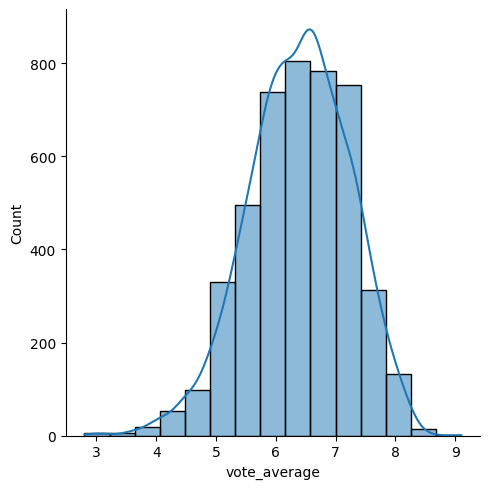

In [97]:
import seaborn as sns

print('Average scores: ', df['vote_average'].mean())
sns.displot(df['vote_average'], bins=15, kde=True)

Vote average follows a normal distribution curve, meaning that the distribution of the scores is approximately normal.

However, the curve is skewed left, meaning that movies with really low scores are more than great scores.

And overall vote average is: 6.3228300733496345

## IMDB Score vs Runtime

Average runtime:  109.49230092388913


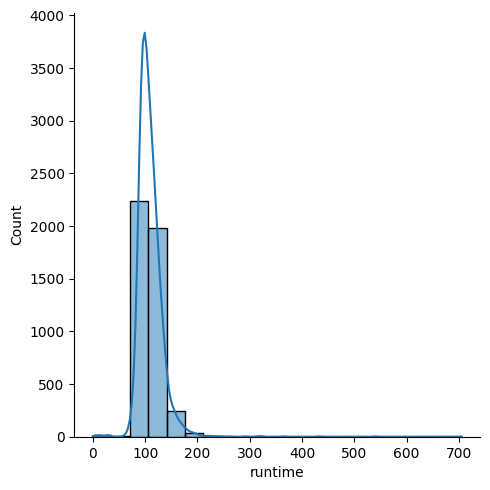

In [98]:
print('Average runtime: ', df['runtime'].mean())
sns.displot(df['runtime'], bins=20, kde=True)

Correlation between runtime and vote_average:  0.321800767114128


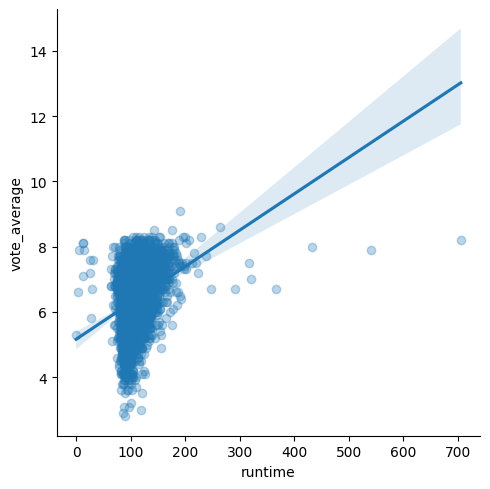

In [99]:
correlation = df['runtime'].corr(df['vote_average'])
print('Correlation between runtime and vote_average: ', correlation)
sns.lmplot(x='runtime', y='vote_average', data = df, scatter_kws={'alpha':0.3})

As seen in the plot, there is a linear relationship between runtime and vote averages.
The correlation coefficient is: 0.32, meaning that there is a medium correlation between runtime and vote averages.
We can say that movies tend to get slightly higher imdb scores as the runtime increases.

## IMDB Score vs Budget

Average budget:  35835071.13176419


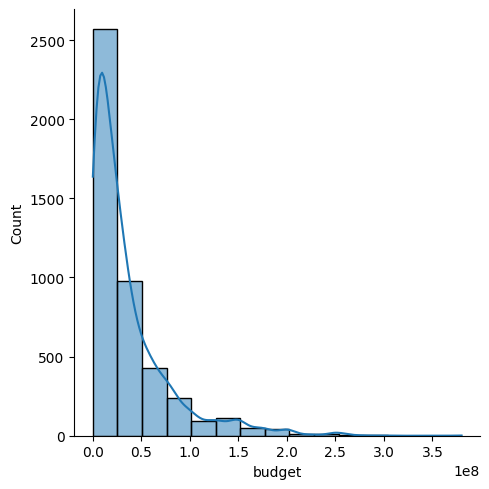

In [100]:
print('Average budget: ', df['budget'].mean())

sns.displot(df['budget'], bins=15, kde=True)

Budgets overall do not follow the normal distribution. Most of the movies published are low-budget movies.

Correlation between budget and vote_average:  -0.08151818704216006


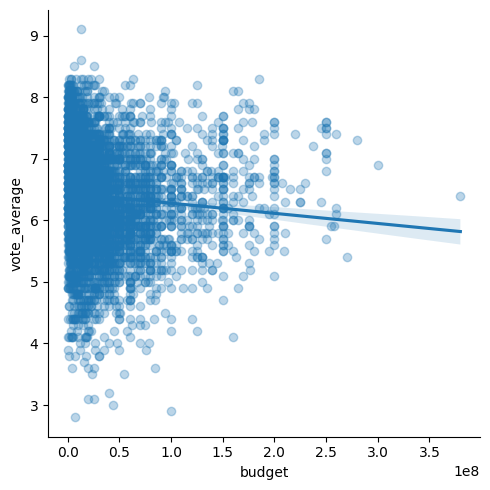

In [101]:
correlation = df['budget'].corr(df['vote_average'])
print('Correlation between budget and vote_average: ', correlation)
sns.lmplot(x='budget', y='vote_average', data = df, scatter_kws={'alpha':0.3})

There is no significant relationship between budget and imdb score, as the correlation coefficient is: -0.08 which is considered as very weak relationship.

This correlation value is not enough for us to interpret these two features.

## IMDB Score vs Time

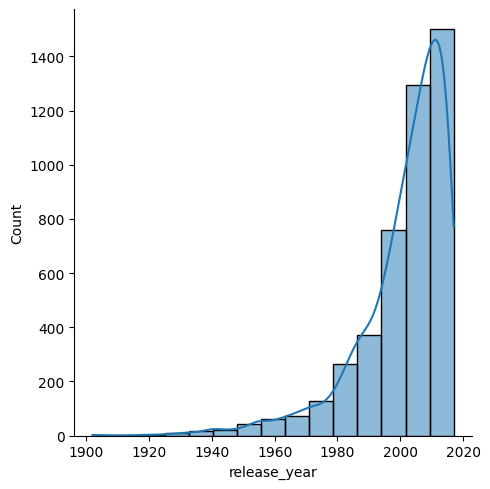

In [102]:
sns.displot(df['release_year'], bins=15, kde=True)

Looking at the distribution, we can see that most of the movies have been published recently.
This shows us that movie sector has been growing rapidly after 2000s.

And before that, we do not see that many movies.

Correlation between vote_average and release_year:  -0.2988805274250864


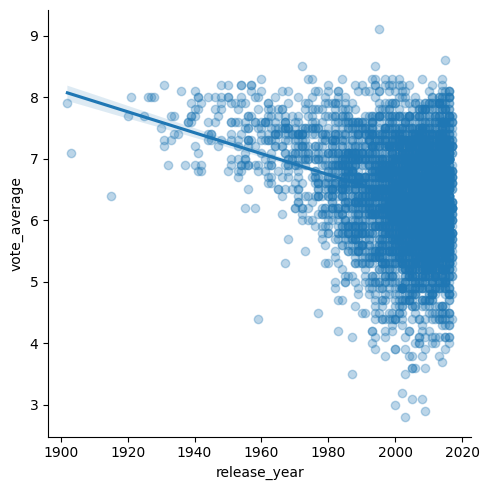

In [103]:
correlation = df['vote_average'].corr(df['release_year'])
print('Correlation between vote_average and release_year: ', correlation)
sns.lmplot(x='release_year', y='vote_average', data = df, scatter_kws={'alpha':0.3})

There is a negative correlation between the vote average and release year. The correlation coefficient is -0.29, meaning that this relation is weak.

However, it still shows us that movie scores are slightly decreasing over time.

In [104]:
df['century'] = df['release_year'].apply(
    lambda x: '20th Century' if 1901 <= x <= 2000 else '21st Century'
)

df.groupby('century').agg(
    avg=('vote_average', 'mean'),
    count=('id', 'count')
)

,avg,count
century,,
20th Century,6.615696,1631
21st Century,6.252762,2915


In [105]:
from scipy.stats import ttest_ind

vote_20th = df[df['century'] == '20th Century']['vote_average']
vote_21st = df[df['century'] == '21st Century']['vote_average']

t_stat, p_value = ttest_ind(vote_20th, vote_21st, equal_var=False)  # Use equal_var=False for Welch's t-test

# Print results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("The averages are significantly different (reject null hypothesis).")
else:
    print("The averages are not significantly different (fail to reject null hypothesis).")

T-statistic: 13.932771861454444
P-value: 6.611971216622168e-43
The averages are significantly different (reject null hypothesis).


We can see that movies published in 20th century is significantly better than movies published in 21st century.
While 20th century movies have an average imdb score of 6.61, 21st century movies have an average imdb score of 6.25.

In [106]:
import matplotlib.pyplot as plt

grouped_by_month = df.groupby('release_month').agg(
    vote_average=('vote_average', 'mean'),
    count=('id', 'count'),
    popularity=('popularity', 'mean')
).reset_index()

grouped_by_month['percentage'] = (grouped_by_month['count'] / grouped_by_month['count'].sum()) * 100

plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x='release_month', 
    y='count', 
    hue='release_month',
    data=grouped_by_month, 
    dodge=False,
    palette=sns.color_palette("tab10"),
    legend=False
)

for bar, percentage in zip(bars.patches, grouped_by_month['percentage']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{percentage:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.title('Number of Movies Released by Month (with Percentages)', fontsize=14)
plt.xlabel('Release Month', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

Looking at the distributions of movies published per month, we can clearly see that movies have been published the most in September and December.

In [ ]:
# Create a candlestick-style chart (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='release_month', 
    y='vote_average', 
    data=df, 
    palette='tab10'
)

# Customize the chart
plt.title('Distribution of Vote Average by Month', fontsize=14)
plt.xlabel('Release Month', fontsize=12)
plt.ylabel('Vote Average', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability

# Show the chart
plt.show()

However, looking at the average IMDB scores for each month, we can say that movie scores appear almost stable accross the months

## Movie Scores vs Genres

In [ ]:
genre_stats = df.groupby('top_1_genre').agg(
    count=('id', 'count'),
    vote_average=('vote_average', 'mean')
).sort_values(by='vote_average', ascending=False)
genre_stats

In [ ]:
genre_stats = df.groupby('top_1_genre').agg(
    count=('id', 'count'),
    vote_average=('vote_average', 'mean')
).sort_values(by='vote_average', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genre_stats.index, y='vote_average', data=genre_stats, palette='Set2')

plt.xlabel('Genre')
plt.ylabel('Average Vote')
plt.title('Average Vote by Genre')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)

plt.show()


I will eliminate TV Movie from the interpretation as only 2 movies were labeled TV Movie. But for the rest of the genres, we can see that Western and Documentary movies have the highest IMDB scores, followed by Drama and History.

Another interpretation is that Horror movies are rated significantly less than other genres. This shows us that there is a lot of bad horror movies.

## IMDB Scores vs Actors

In [ ]:
actor_stats = df.groupby('top_1_actor').agg(
    movie_count=('top_1_actor', 'count'),
    movie_score=('vote_average', 'mean')
).reset_index()
sns.displot(actor_stats['movie_count'], bins=15, kde=True)

print(f'Average movie number per actor is: {actor_stats['movie_count'].mean()}')

In [ ]:
percentile_90 = np.percentile(actor_stats['movie_count'], 90)

print(f"90th Percentile: {percentile_90}")

Since the movie counts of actors played is not following a normal distribution, I will take the 90th percentile as a threshold for the number of movies actors played, for better interpretation on deciding which actor has the highest average IMDB score.

In [ ]:
actor_stats_filtered = actor_stats[actor_stats['movie_count'] >= 6]
actor_stats_filtered.sort_values(by='movie_score', ascending=False).head(10)

In [ ]:
actor_stats_filtered.sort_values(by='movie_score', ascending=True).head(10)

In [ ]:
from wordcloud import WordCloud

actor_stats_for_wordcloud = actor_stats_filtered.sort_values(by='movie_score', ascending=False)
actor_wordcloud_data = dict(zip(actor_stats_for_wordcloud['top_1_actor'], actor_stats_for_wordcloud['movie_score']))

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(actor_wordcloud_data)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Charlie Chaplin, James Stewart and Cary Grant have the highest average IMDB scores. On the other hand; Jesse Bradford, Steven Seagal and Christopher Lambert have the least average IMDB scores.

## Directors

In [ ]:
director_stats = df.groupby('top_1_director').agg(
    movie_count=('top_1_director', 'count'),
    movie_score=('vote_average', 'mean'),
).reset_index()
sns.displot(director_stats['movie_count'], bins=15, kde=True)

In [ ]:
percentile_90 = np.percentile(director_stats['movie_count'], 90)

print(f"90th Percentile: {percentile_90}")

Again, just like what we did in the actors section, we will apply the 90th percentile for a fair comparison.

In [ ]:
director_stats_filtered = director_stats[director_stats['movie_count'] >= 5]
director_stats_filtered.sort_values(by='movie_score', ascending=False).head(10)

In [ ]:
director_stats_filtered.sort_values(by='movie_score', ascending=True).head(10)

In [ ]:
director_stats_for_wordcloud = director_stats_filtered.sort_values(by='movie_score', ascending=False)
director_wordcloud_data = dict(zip(director_stats_for_wordcloud['top_1_director'], director_stats_for_wordcloud['movie_score']))

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(director_wordcloud_data)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Again we see Charlie Chaplin as the highest average IMDB score. Followed by: Sergio Leone, Hayao Miyazaki and Billy Wilder. Directors that had the least average IMDB scores are: Jason Friedberg, Brian Levant and Jonathan Frakes.

## Language

In [ ]:
language_stats = df.groupby('original_language').agg(
    movie_count=('id', 'count'),
    movie_score=('vote_average', 'mean')
).sort_values(by='movie_count', ascending=False)

sns.displot(language_stats['movie_count'], bins=15, kde=True)

As expected, most of the movies are in English. So we do not have an equally distributed data. We will be applying a similar strategy as we did with actors and directors. However now, instead of 90th percentile, I will take the 75th percentile of our data because of massive domination of English.

In [ ]:
percentile_75 = np.percentile(language_stats['movie_count'], 75)
percentile_75

In [ ]:
language_stats_filtered = language_stats[language_stats['movie_count'] >= 14]
language_stats_filtered = language_stats_filtered.sort_values(by='movie_score', ascending=False)
language_stats_filtered

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=language_stats_filtered.index, y='movie_score', data=language_stats_filtered, palette='Set2')

plt.xlabel('Language')
plt.ylabel('Average Movie Score')
plt.title('Average Movie Score by Language')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)

plt.show()


Wee see that German, Indian and Korean movies are in top 3, followed by Italian, Japanese and so on. English has the least average IMDB scores, but it is mainly because there are too many movies in English. 

## Keywords

In [ ]:
keyword_stats = df.groupby('top_1_keyword').agg(
    movie_count=('id', 'count'),
    movie_score=('vote_average', 'mean')
)
sns.displot(keyword_stats['movie_count'], bins=15, kde=True)

In [ ]:
percentile_90 = np.percentile(keyword_stats['movie_count'], 90)
percentile_90

In [ ]:
keyword_stats_filtered = keyword_stats[keyword_stats['movie_count'] >= 7]
keyword_stats_filtered.sort_values(by='movie_score', ascending=False).head(10)

In [ ]:
keyword_stats_filtered.sort_values(by='movie_score', ascending=True).head(10)

In [ ]:
word_freq = keyword_stats_filtered['movie_score'].to_dict()

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.show()

The keywords: individiual, child abuse and germany have the highest average IMDB score. And the keywords: time, heist and vampire have the least.

# Training

## Encoding

In [107]:
# Training

from sklearn.model_selection import KFold

def target_encode(data, col, target, n_splits=5, smooth=5):
    """
    Performs leakage-free target encoding with K-fold cross-validation.
    
    Args:
        data (pd.DataFrame): Input dataframe.
        col (str): Column to encode.
        target (str): Target column name.
        n_splits (int): Number of folds for cross-validation.
        smooth (float): Smoothing factor to reduce variance for rare categories.

    Returns:
        pd.Series: Target-encoded column.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    encoded_col = pd.Series(index=data.index, dtype=float)

    for train_idx, val_idx in kf.split(data):
        train, val = data.iloc[train_idx], data.iloc[val_idx]
        # Compute mean target per category in the training set
        category_means = train.groupby(col)[target].mean()
        global_mean = train[target].mean()  # Overall mean for smoothing
        category_counts = train.groupby(col)[target].count()

        # Smooth encoding (optional)
        smoothed_means = (category_means * category_counts + global_mean * smooth) / (category_counts + smooth)

        # Map the encoded values to the validation set
        encoded_col.iloc[val_idx] = val[col].map(smoothed_means).fillna(global_mean)
    
    return encoded_col

In [108]:
df['top_1_genre'] = target_encode(
    df, col='top_1_genre', target='vote_average'
)

df['top_1_actor'] = target_encode(
    df, col='top_1_actor', target='vote_average'
)

df['top_2_actor'] = target_encode(
    df, col='top_2_actor', target='vote_average'
)

df['top_1_director'] = target_encode(
    df, col='top_1_director', target='vote_average'
)

actor_gross = df.groupby('top_1_actor')['revenue'].agg(['mean']).reset_index()
actor_gross.columns = ['top_1_actor', 'actor_avg_gross']

df = df.merge(actor_gross, on='top_1_actor', how='left')

director_gross = df.groupby('top_1_director')['revenue'].agg(['mean']).reset_index()
director_gross.columns = ['top_1_director', 'director_avg_gross']

df = df.merge(director_gross, on='top_1_director', how='left')

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Example sentiment scoring for keywords
df['keyword_sentiment'] = df['top_1_keyword'].apply(lambda x: sia.polarity_scores(x)['compound'])

df = pd.get_dummies(df, columns=['original_language'], prefix='Language', drop_first=True, dtype=int)

#df = pd.get_dummies(df, columns=['top_1_keyword'], prefix='Keyword', drop_first=True, dtype=int)

df['top_1_company'] = target_encode(
    df, col='top_1_company', target='vote_average'
)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\90538\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [109]:
language_columns = [col for col in df.columns if col.startswith('Language')]
keyword_columns = [col for col in df.columns if col.startswith('Keyword')]

In [124]:
df[['top_1_keyword', 'keyword_sentiment']][df['keyword_sentiment'] >= 0].head(30)

,top_1_keyword,keyword_sentiment
1,board game,0.0
2,robbery,0.0
3,paris,0.0
5,cuba,0.0
6,white house,0.0
7,exotic island,0.0
8,poker,0.0
9,bowling,0.0
10,hotel,0.0
11,africa,0.0


## Classification

In [125]:
# Create a new column based on the intervals
bins = [0, 4, 6, 8, 10]  # Interval edges
labels = ['0-4', '4-6', '6-8', '8-10']  # Interval labels
df['score_range'] = pd.cut(df['vote_average'], bins=bins, labels=labels, right=False)

In [129]:
from sklearn.model_selection import train_test_split

X = df[['top_1_genre', 'top_1_company', 'budget',
        'runtime', 'release_year', 'release_month',
        'top_1_actor', 'top_1_director',
        'title', 'keyword_sentiment', 'actor_avg_gross', 'director_avg_gross']].copy()

X = pd.concat([X, df[language_columns]], axis=1)
y = df['score_range']

X['runtime_budget'] = X['budget'] * X['runtime']
X['director_year'] = X['top_1_director'] * X['release_year']

first_movie_year = df.groupby('top_1_actor')['release_year'].min()
X['actor_career_length'] = X['release_year'] - X['top_1_actor'].map(first_movie_year)

X['is_franchise'] = X['title'].apply(lambda x: 1 if '2' in x or '3' in x or 'Part' in x else 0)
X = X.drop('title', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(4546, 45)
(3636, 45)
(910, 45)


## CatBoost

In [141]:
from catboost import CatBoostClassifier, Pool
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)

# Define the CatBoost model for classification
catboost_model = CatBoostClassifier(
    iterations=1000,          # Number of boosting iterations
    learning_rate=0.1,        # Learning rate
    depth=6,                  # Depth of the tree
    loss_function='MultiClass',  # Logloss is used for binary classification
    verbose=100               # Show progress every 100 iterations
)

# Train the model
catboost_model.fit(train_pool, eval_set=test_pool)

# Make predictions
y_pred = catboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

0:	learn: 1.2694218	test: 1.2696437	best: 1.2696437 (0)	total: 13.4ms	remaining: 13.4s
100:	learn: 0.4838285	test: 0.5474440	best: 0.5474440 (100)	total: 1.3s	remaining: 11.6s
200:	learn: 0.4066530	test: 0.5415112	best: 0.5404827 (156)	total: 2.45s	remaining: 9.74s
300:	learn: 0.3489756	test: 0.5366329	best: 0.5362149 (288)	total: 3.95s	remaining: 9.18s
400:	learn: 0.3037412	test: 0.5399897	best: 0.5358882 (365)	total: 5.34s	remaining: 7.98s
500:	learn: 0.2660980	test: 0.5441302	best: 0.5358882 (365)	total: 6.54s	remaining: 6.51s
600:	learn: 0.2368895	test: 0.5461933	best: 0.5358882 (365)	total: 7.83s	remaining: 5.2s
700:	learn: 0.2093534	test: 0.5534788	best: 0.5358882 (365)	total: 8.99s	remaining: 3.83s
800:	learn: 0.1860091	test: 0.5579976	best: 0.5358882 (365)	total: 10s	remaining: 2.49s
900:	learn: 0.1670501	test: 0.5639678	best: 0.5358882 (365)	total: 11.1s	remaining: 1.22s
999:	learn: 0.1505627	test: 0.5673619	best: 0.5358882 (365)	total: 12.1s	remaining: 0us

bestTest = 0.53588

## RandomForest

In [142]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred2 = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))

Accuracy: 0.7428571428571429


## Bagging

In [143]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Train the model
bagging.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7362637362637363


## XGBoost

In [144]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Step 1: Encode the target variable (y_train and y_test)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Fit and transform training labels
y_test_encoded = label_encoder.transform(y_test)       # Only transform test labels (don't fit again)

# Step 2: Use the encoded labels in your model
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    colsample_bytree=0.6,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False
)
xgb_clf.fit(X_train, y_train_encoded)

# Step 3: Predict and decode back if needed
y_pred_encoded = xgb_clf.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)  # Decode predictions to original labels

# Step 4: Evaluate
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_encoded)}")
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_encoded, target_names=label_encoder.classes_))

C:\Users\90538\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:22:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7516483516483516

Classification Report:
               precision    recall  f1-score   support

         0-4       0.00      0.00      0.00         4
         4-6       0.64      0.50      0.56       269
         6-8       0.79      0.88      0.83       622
        8-10       0.50      0.07      0.12        15

    accuracy                           0.75       910
   macro avg       0.48      0.36      0.38       910
weighted avg       0.73      0.75      0.74       910



C:\Users\90538\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\90538\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\90538\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## GradientBoosting

In [797]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7274725274725274

Classification Report:
               precision    recall  f1-score   support

         0-4       0.40      0.29      0.33         7
         4-6       0.66      0.43      0.52       289
         6-8       0.76      0.88      0.81       599
        8-10       0.39      0.47      0.42        15

    accuracy                           0.73       910
   macro avg       0.55      0.52      0.52       910
weighted avg       0.72      0.73      0.71       910



## Extra Tree

In [145]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Initialize the Extra Trees Classifier
extra_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
extra_clf.fit(X_train, y_train)

# Make predictions
y_pred = extra_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Extra Trees Accuracy: {accuracy}")


Extra Trees Accuracy: 0.7351648351648352


## CV

In [146]:
def compute_cv(model, X, y, scoring='accuracy'):
    
    from sklearn.model_selection import cross_val_score, KFold
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(model, X, y, cv=kf, scoring=scoring)
    
    print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
    print(f'Mean Accuracy: {cross_val_results.mean()}')


In [150]:
compute_cv(catboost_model, X, y)
compute_cv(rf, X, y)
compute_cv(bagging, X, y)
compute_cv(extra_clf, X, y)
compute_cv(gb_clf, X, y)

0:	learn: 1.2627196	total: 10.3ms	remaining: 10.3s
100:	learn: 0.4833529	total: 1.17s	remaining: 10.4s
200:	learn: 0.4050807	total: 2.4s	remaining: 9.56s
300:	learn: 0.3506829	total: 4.13s	remaining: 9.6s
400:	learn: 0.3054214	total: 5.37s	remaining: 8.02s
500:	learn: 0.2672557	total: 6.66s	remaining: 6.63s
600:	learn: 0.2348704	total: 7.86s	remaining: 5.22s
700:	learn: 0.2089131	total: 9.06s	remaining: 3.86s
800:	learn: 0.1862394	total: 10.2s	remaining: 2.52s
900:	learn: 0.1677428	total: 11.5s	remaining: 1.26s
999:	learn: 0.1511833	total: 12.5s	remaining: 0us
0:	learn: 1.2671586	total: 5.7ms	remaining: 5.69s
100:	learn: 0.4842361	total: 1.38s	remaining: 12.3s
200:	learn: 0.4081282	total: 2.59s	remaining: 10.3s
300:	learn: 0.3529835	total: 3.79s	remaining: 8.8s
400:	learn: 0.3068818	total: 5.04s	remaining: 7.53s
500:	learn: 0.2683153	total: 6.05s	remaining: 6.03s
600:	learn: 0.2374156	total: 7.15s	remaining: 4.75s
700:	learn: 0.2131763	total: 8.17s	remaining: 3.48s
800:	learn: 0.189388

NameError: name 'gb_clf' is not defined

In [148]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, colsample_bytree=0.6, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Fit and transform training labels
compute_cv(xgb_clf, X, y_encoded)

C:\Users\90538\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:41:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\90538\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:41:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\90538\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:41:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Cross-Validation Results (Accuracy): [0.76923077 0.75907591 0.72717272 0.73707371 0.76787679]
Mean Accuracy: 0.7520859778285521


## Hyperparameter Tuning for XGBoost;

In [62]:
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier

def objective(trial):
    # Define hyperparameter search space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5)
    }

    # Initialize the model with sampled hyperparameters
    model = XGBClassifier(**params, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

    # Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y_encoded, cv=skf, scoring='accuracy')

    # Return the average accuracy across all folds
    return scores.mean()

# Create a study to maximize accuracy
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best parameters and accuracy
print("Best Parameters:", study.best_params)
print("Best CV Accuracy:", study.best_value)

[I 2025-01-24 22:04:01,608] A new study created in memory with name: no-name-ea596bd6-4827-4d5e-b863-00e6a64407ec
[I 2025-01-24 22:04:45,406] Trial 0 finished with value: 0.7406494275801206 and parameters: {'n_estimators': 366, 'max_depth': 5, 'learning_rate': 0.1705134162697736, 'subsample': 0.6138184043667739, 'colsample_bytree': 0.9101707726337365, 'reg_alpha': 0.16338696089261218, 'reg_lambda': 1.8239379649255298, 'min_child_weight': 7, 'gamma': 1.9842679047562277}. Best is trial 0 with value: 0.7406494275801206.
[I 2025-01-24 22:05:35,034] Trial 1 finished with value: 0.7413104607164013 and parameters: {'n_estimators': 220, 'max_depth': 12, 'learning_rate': 0.015524752232836059, 'subsample': 0.5691185467283308, 'colsample_bytree': 0.9797767362337548, 'reg_alpha': 0.0008363265164777832, 'reg_lambda': 5.5670488541384335, 'min_child_weight': 6, 'gamma': 1.2289049792532065}. Best is trial 1 with value: 0.7413104607164013.
[I 2025-01-24 22:06:07,935] Trial 2 finished with value: 0.7380

Best Parameters: {'n_estimators': 685, 'max_depth': 3, 'learning_rate': 0.11099935600144586, 'subsample': 0.9367077176875425, 'colsample_bytree': 0.5924124221868153, 'reg_alpha': 0.003835451953769768, 'reg_lambda': 9.388480558584794e-07, 'min_child_weight': 3, 'gamma': 1.117671281249888}
Best CV Accuracy: 0.7454884609340053


In [71]:
study.best_value

0.7454884609340053

## AutoGluon

In [33]:
from autogluon.tabular import TabularPredictor

# Prepare data for AutoGluon
data = pd.concat([X, y], axis=1)  # Combine features (X) and target (y) into one DataFrame
train_data = data.sample(frac=0.8, random_state=42)  # 80% training data
test_data = data.drop(train_data.index)  # 20% testing data

# Define predictor and train
predictor = TabularPredictor(label=y.name, eval_metric='accuracy')  # Replace 'accuracy' with your preferred metric
predictor.fit(train_data, time_limit=1200, presets='experimental')  # Train for 10 minutes (adjust time_limit as needed)

# Evaluate on test data
performance = predictor.evaluate(test_data)

performance

No path specified. Models will be saved in: "AutogluonModels\ag-20250127_063516"
Preset alias specified: 'experimental' maps to 'experimental_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.2
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
Memory Avail:       2.73 GB / 7.82 GB (34.9%)
Disk Space Avail:   22.17 GB / 180.69 GB (12.3%)
Presets specified: ['experimental']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. C

{'accuracy': 0.7645764576457645,
 'balanced_accuracy': 0.3512948075909331,
 'mcc': 0.43027353473246266}

In [133]:
from sklearn.metrics import accuracy_score

predictor = TabularPredictor.load(r"C:\Users\90538\Desktop\data-science\AutogluonModels\ag-20250127_063516")

In [134]:
predictor.feature_importance(data=pd.concat([X_test, y_test], axis=1), feature_stage='transformed')

These features in provided data are not utilized by the predictor and will be ignored: ['Language_fi', 'Language_nl', 'Language_pl', 'Language_ro', 'Language_sr', 'Language_tr', 'Language_xx']
Computing feature importance via permutation shuffling for 38 features using 910 rows with 5 shuffle sets...
	640.69s	= Expected runtime (128.14s per shuffle set)
	138.73s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
runtime,0.113846,0.010671,9.155773e-06,5,0.135818,0.091874
top_1_actor,0.077143,0.002114,6.757742e-08,5,0.081495,0.072791
release_year,0.073407,0.004213,1.296597e-06,5,0.082082,0.064731
top_1_genre,0.072308,0.007181,1.151978e-05,5,0.087093,0.057522
budget,0.066813,0.008053,2.483992e-05,5,0.083394,0.050232
director_avg_gross,0.059341,0.005213,7.071578e-06,5,0.070073,0.048608
top_1_company,0.058462,0.003595,1.706539e-06,5,0.065863,0.051060
actor_avg_gross,0.056703,0.005527,1.069895e-05,5,0.068084,0.045322
top_1_director,0.052967,0.007347,4.330601e-05,5,0.068095,0.037839
runtime_budget,0.052967,0.006836,3.257094e-05,5,0.067043,0.038891


In [130]:
for i in range(10):
    random_row = X_test.sample(n=1)
    
    index = random_row.index
    movie = df.loc[index]

    predicted_value = predictor.predict(random_row)

    print('---------------------------------')
    print('Title: ', movie['title'])
    print('Release Year: ', movie['release_year'])
    print('Predicted Score: ', predicted_value)
    print('Actual Score: ', movie['score_range'])

---------------------------------
Title:  1421    Twins
Name: title, dtype: object
Release Year:  1421    1988
Name: release_year, dtype: int32
Predicted Score:  1421    4-6
Name: score_range, dtype: object


KeyError: 'score_range'